In [38]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [3]:
# create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

In [7]:
# create tensorflow begin ####
weights = tf.Variable(tf.random_uniform([1],-1.0,1.0))
biases = tf.Variable(tf.zeros([1]))
y = weights * x_data + biases

loss = tf.reduce_mean(tf.square(y-y_data))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()
# create tensorflow end ####

# 创建session ，必须run init
sess = tf.Session()
sess.run(init)

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step,sess.run(weights),sess.run(biases))
            


0 [-0.32029098] [0.86871564]
20 [-0.04894033] [0.39046815]
40 [0.06034178] [0.3240889]
60 [0.08944023] [0.30641416]
80 [0.09718826] [0.3017079]
100 [0.09925132] [0.30045477]
120 [0.09980065] [0.3001211]
140 [0.09994692] [0.30003226]
160 [0.09998587] [0.3000086]
180 [0.09999623] [0.3000023]
200 [0.099999] [0.30000064]


# session两种打开方式

In [11]:
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],[2]])


product = tf.matmul(matrix1,matrix2)  # numpy np.dot(matrix1,matrix2)


# 方法1
#sess = tf.Session()
#result = sess.run(product)
#print(result)
#sess.close()


# 方法2 
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)
    

[[12]]


# Variable变量

In [12]:
state = tf.Variable(0,name='counter')
#print(state.name)

counter:0


In [14]:
one = tf.constant(1)
print(one)
new_value = tf.add(state , one)
print(new_value)
update =tf.assign(state,new_value)
print(update)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

Tensor("Const_11:0", shape=(), dtype=int32)
Tensor("Add_4:0", shape=(), dtype=int32)
Tensor("Assign_1:0", shape=(), dtype=int32_ref)
1
2
3


In [21]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1,input2)


with tf.Session() as sess:
    print(sess.run(output,feed_dict={input1:[7.],input2:[2.0]}))

[14.]


In [29]:
def add_layer(input,in_size,out_size,activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size]) + 0.1)
    Wx_plus_b = tf.matmul(input,Weights)+biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outpluts


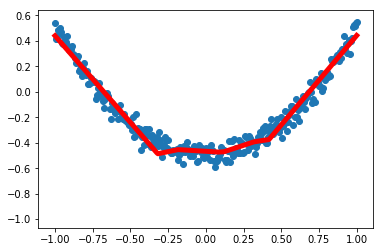

In [85]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

def add_layer(input,in_size,out_size,activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size]) + 0.1)
    Wx_plus_b = tf.matmul(input,Weights)+biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs


x_data = np.linspace(-1,1,300)[:,np.newaxis]
#print(x_data)
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise
#print(y_data)

xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

l1 = add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction = add_layer(l1,10,1,activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices = [1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()#本次运行请注释，全局运行不要注释
#plt.show()


for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r', lw=5)
        #plt.pause(0.1)



In [89]:

from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline


def add_layer(input,in_size,out_size,n_layer,activation_function=None):
    layer_name = 'layer%s' % n_layer
    with tf.name_scope(layer_name):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size,out_size]),name='W')
            tf.summary.histogram(layer_name+'/weights',Weights)
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1,out_size]) + 0.1,name='B')
            tf.summary.histogram(layer_name+'/biases',biases)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.matmul(input,Weights)+biases
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        tf.summary.histogram(layer_name+'/outputs',outputs)
        return outputs


x_data = np.linspace(-1,1,300)[:,np.newaxis]
#print(x_data)
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise
#print(y_data)

with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32,[None,1],name='x_input')
    ys = tf.placeholder(tf.float32,[None,1],name='y_input')

l1 = add_layer(xs,1,10,n_layer=1,activation_function=tf.nn.relu)
prediction = add_layer(l1,10,1,n_layer=2,activation_function=None)

with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices = [1]))
    tf.summary.scalar('loss',loss)
    
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


sess = tf.Session()
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter("logs/",sess.graph)

sess.run(tf.initialize_all_variables())


#for i in range(1000):
#    # training
#    sess.run(train_step, feed_dict={xs:x_data,ys:y_data})
#    if i % 50 == 0:        
#        result = sess.run(merged, feed_dict={xs: x_data, ys: y_data})
#        writer.add_summary(result,i)
    